# Analiza zbioru - House Prices - Advanced Regression Techniques

Maciej Wojciechowski

**Jaka jest zmienna docelowa (target variable), którą chcemy
przewidywać?**

Zmienna docelowa którą chcemy przewidywać to SalePrice, opis każdej zmiennej możemy znaleźć na stronie https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


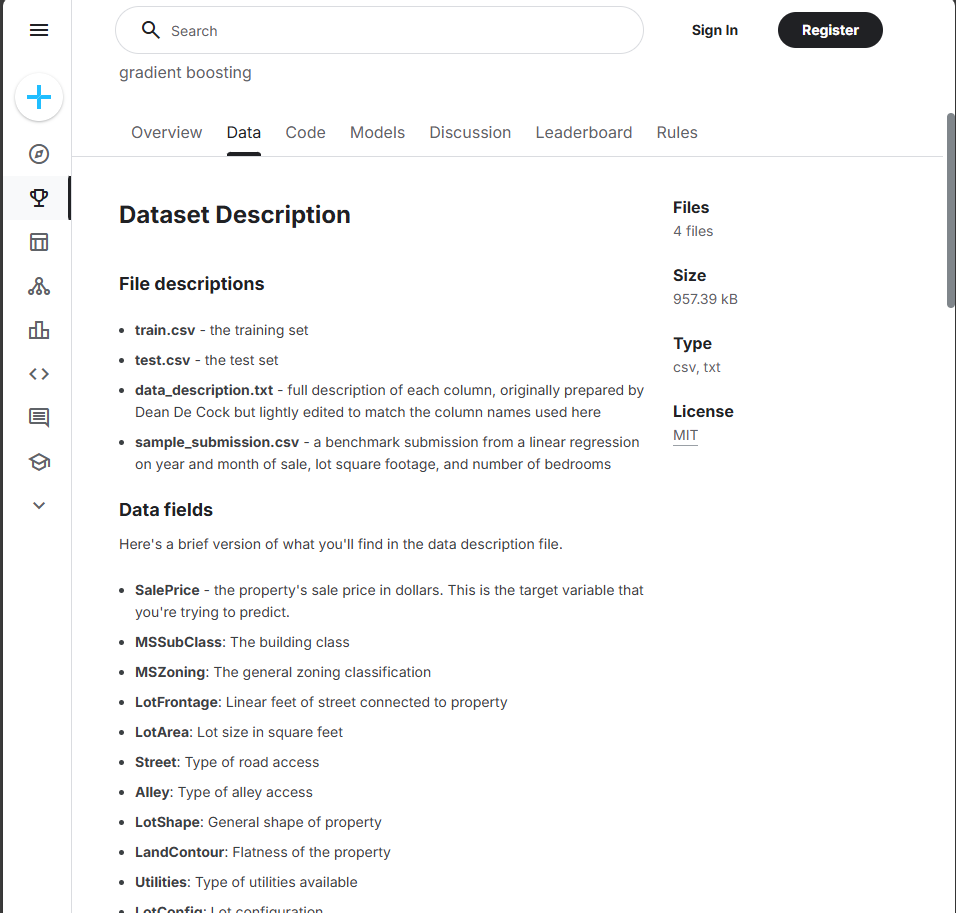

**Jakie rodzaje zmiennych masz w zbiorze? (numeryczne,
kategoryczne, tekstowe?)**


W tym celu:

In [13]:
import pandas as pd

#1. Wczytuje dane
df = pd.read_csv("train.csv")

#2. Sprawdzam  kształt danych
print("Liczba wierszy i kolumn:", df.shape)

#3. Wyświetlam pierwsze 5 wierszy
display(df.head())

#4. Sprawdzam typy danych
df.info()


Liczba wierszy i kolumn: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Na tej podstawie możemy wyciągnąc następujące wnioski:

*   mamy 1460 wierszy i 81 kolumn,
*   czyli 80 cech + SalePrice jako cel,
*   część kolumn ma braki danych (np. Alley, FireplaceQu, PoolQC, Fence, MiscFeature),
*   są różne typy danych: liczby całkowite (int64), zmiennoprzecinkowe (float64) i kategorie (object).



**• Wyświetl podstawowe statystyki opisowe**

W tym celu użyje metody describe() z atrybutem T aby transponować tabele

In [14]:

df.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Z wyświetlonych w ten sposób danych możemy między innymi wyczytać następujące informacje dotyczące zmiennej SalePrice

| Statystyka   | Znaczenie                                                             | Wartość       |
| ------------ | --------------------------------------------------------------------- | ------------- |
| **count**    | liczba domów (czyli ile niepustych wartości)                          | 1460          |
| **mean**     | średnia cena                                                          | ≈ 180 921 USD |
| **std**      | odchylenie standardowe (czyli jak bardzo ceny się różnią między sobą) | ≈ 79 442 USD  |
| **min**      | najtańszy dom                                                         | 34 900 USD    |
| **25% (Q1)** | 25% domów jest tańszych niż ta cena                                   | 129 975 USD   |
| **50% (Q2)** | mediana (środkowa wartość)                                            | 163 000 USD   |
| **75% (Q3)** | 75% domów jest tańszych niż ta cena                                   | 214 000 USD   |
| **max**      | najdroższy dom                                                        | 755 000 USD   |


Na tej podstawie możemy wysunąć następujące wnioski:

Średnia cena domu w zbiorze to około 180 921 USD, a mediana 163 000 USD.

Średnia jest wyższa niż mediana, co oznacza, że rozkład jest prawoskośny – kilka bardzo drogich domów podnosi średnią.

Ceny wahają się od 34 900 USD do 755 000 USD, co pokazuje duże zróżnicowanie rynku nieruchomości.

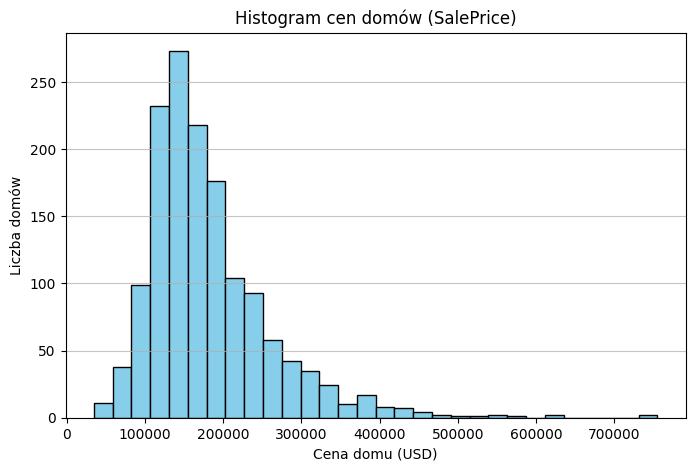

In [15]:
import matplotlib.pyplot as plt

# Ustawienia wykresu
plt.figure(figsize=(8,5))
plt.hist(df["SalePrice"], bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram cen domów (SalePrice)")
plt.xlabel("Cena domu (USD)")
plt.ylabel("Liczba domów")
plt.grid(axis="y", alpha=0.75)
plt.show()


Histogram cen domów pokazuje, że rozkład jest asymetryczny (prawoskośny) – większość domów ma ceny skupione w przedziale 100 000–200 000 USD, natomiast kilka nieruchomości osiąga znacznie wyższe wartości (nawet powyżej 600 000 USD).

To potwierdza wniosek z wcześniejszej analizy: kilka bardzo drogich domów zawyża średnią, przez co średnia jest wyższa niż mediana.

Wykonamy teraz boxplot aby zwizualizować wartości odstające

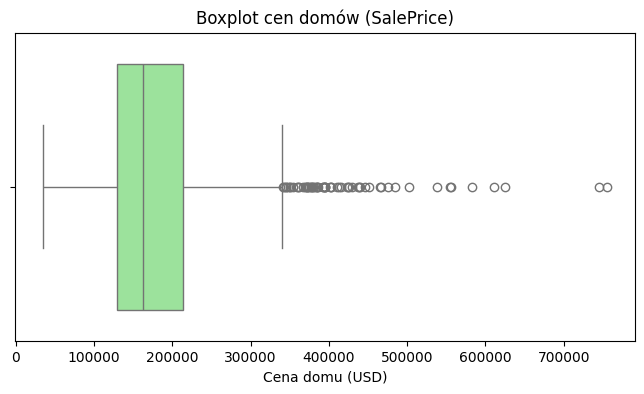

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df["SalePrice"], color="lightgreen")
plt.title("Boxplot cen domów (SalePrice)")
plt.xlabel("Cena domu (USD)")
plt.show()


Boxplot pokazuje, że większość cen mieści się w przedziale od około 130 000 USD do 215 000 USD (czyli między kwartylem Q1 i Q3).
Widać jednak kilka punktów znacznie wykraczających poza ten zakres — to outliery, czyli pojedyncze bardzo drogie domy, których cena przekracza 400 000–700 000 USD.

Takie obserwacje mogą oznaczać:

luksusowe nieruchomości o wyjątkowych cechach (np. duża działka, wysoka jakość wykończenia),

albo potencjalne wartości odstające, które mogą zaburzać działanie modeli predykcyjnych.

Następnym krokiem w naszej analizie będzie analiza liczby potencjalnych outlinerów

In [17]:
# Podstawowe statystyki
Q1 = df["SalePrice"].quantile(0.25)
Q3 = df["SalePrice"].quantile(0.75)
IQR = Q3 - Q1  # zakres międzykwartylowy

minimum = df["SalePrice"].min()
maximum = df["SalePrice"].max()
mean = df["SalePrice"].mean()
median = df["SalePrice"].median()

print(f"Q1 (25%): {Q1:.0f}")
print(f"Mediana (50%): {median:.0f}")
print(f"Q3 (75%): {Q3:.0f}")
print(f"IQR: {IQR:.0f}")
print(f"Min: {minimum:.0f}")
print(f"Max: {maximum:.0f}")
print(f"Średnia: {mean:.0f}")


Q1 (25%): 129975
Mediana (50%): 163000
Q3 (75%): 214000
IQR: 84025
Min: 34900
Max: 755000
Średnia: 180921


In [18]:
# Granice dla outlierów
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[df["SalePrice"] > upper_bound]
print(f"Liczba potencjalnych outlierów: {len(outliers)}")
display(outliers[["Id", "SalePrice"]].head())



Liczba potencjalnych outlierów: 61


,Id,SalePrice
11,12,345000
53,54,385000
58,59,438780
112,113,383970
151,152,372402


Podstawowe statystyki potwierdzają, że mediana ceny domu wynosi 163 000 USD, a średnia 180 921 USD.
Zakres międzykwartylowy (IQR) to ok. 84 000 USD, a większość cen mieści się między 130 000 a 214 000 USD.

Zgodnie z regułą
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR, ceny powyżej około 340 000 USD można uznać za outliery.
Takich domów jest kilkanaście — są to zapewne duże lub luksusowe nieruchomości, które znacząco odstają od reszty rynku.

# Co wpływa na cenę domu?

Zaczynamy od znalezienia zmiennych związanych z powierzchnią


In [19]:
# Szukamy kolumn zawierających 'Area' lub 'SF'
area_cols = [c for c in df.columns if "Area" in c or "SF" in c]
print("Kolumny związane z powierzchnią:")
print(area_cols)


Kolumny związane z powierzchnią:
['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea']


Najbardziej oczywista miara „wielkości domu” to GrLivArea (Ground Living Area).

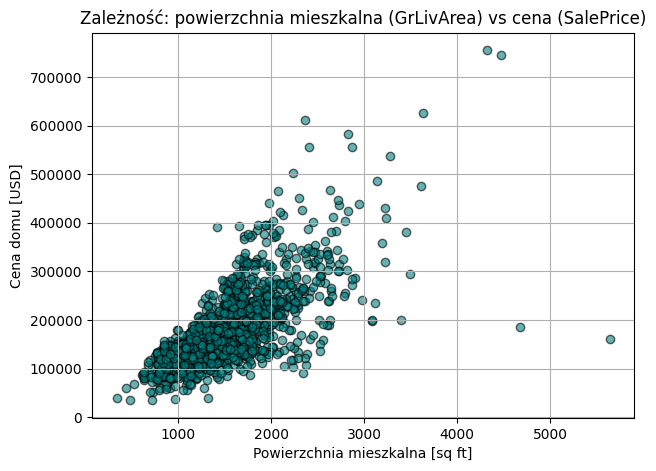

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(df["GrLivArea"], df["SalePrice"], alpha=0.6, color="teal", edgecolor="k")
plt.title("Zależność: powierzchnia mieszkalna (GrLivArea) vs cena (SalePrice)")
plt.xlabel("Powierzchnia mieszkalna [sq ft]")
plt.ylabel("Cena domu [USD]")
plt.grid(True)
plt.show()


Wykres rozrzutu pokazuje wyraźną dodatnią zależność między powierzchnią mieszkalną (GrLivArea) a ceną (SalePrice).
Większe domy są generalnie droższe, co potwierdza hipotezę.

Zależność wydaje się prawie liniowa, chociaż dla bardzo dużych domów widać kilka odstających obserwacji — duże nieruchomości sprzedane znacznie taniej niż reszta.

Aby potwierdzić tezę sprawdzimy korelację dla pozostałych zmiennych

In [21]:
# Lista kolumn związanych z powierzchnią
area_cols = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
              'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
              'LowQualFinSF', 'GrLivArea', 'GarageArea',
              'WoodDeckSF', 'OpenPorchSF', 'PoolArea']

# Tworzymy ramkę z korelacjami względem SalePrice
corrs = df[area_cols + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)

# Usuwamy samą SalePrice, bo korelacja z samą sobą = 1
corrs = corrs.drop('SalePrice')

# Wyświetlamy tabelę korelacji
corrs_df = corrs.reset_index()
corrs_df.columns = ['Zmienna', 'Korelacja z SalePrice']
corrs_df


,Zmienna,Korelacja z SalePrice
0,GrLivArea,0.708624
1,GarageArea,0.623431
2,TotalBsmtSF,0.613581
3,1stFlrSF,0.605852
4,MasVnrArea,0.477493
5,BsmtFinSF1,0.386420
6,WoodDeckSF,0.324413
7,2ndFlrSF,0.319334
8,OpenPorchSF,0.315856
9,LotArea,0.263843


Wizualizacja tabeli

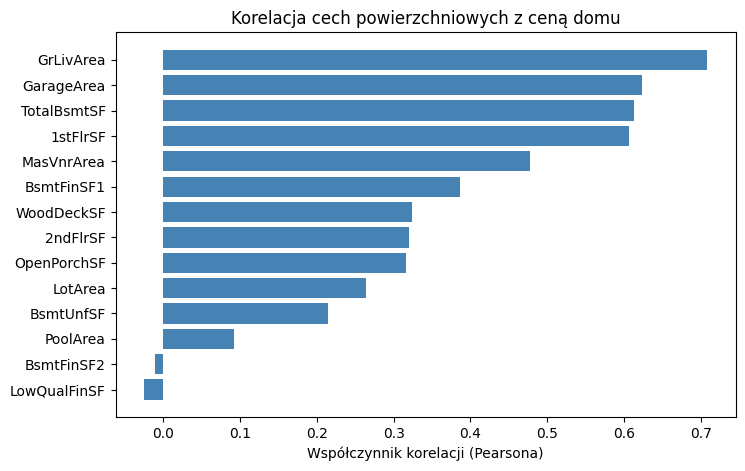

In [22]:
plt.figure(figsize=(8,5))
plt.barh(corrs_df['Zmienna'], corrs_df['Korelacja z SalePrice'], color='steelblue')
plt.gca().invert_yaxis()  # żeby najwyższe były na górze
plt.title("Korelacja cech powierzchniowych z ceną domu")
plt.xlabel("Współczynnik korelacji (Pearsona)")
plt.show()


Wnioski:

Najsilniej z ceną (SalePrice) koreluje powierzchnia mieszkalna nad ziemią (GrLivArea), współczynnik ≈ 0.7 — to bardzo mocna zależność dodatnia.
Oznacza to, że im większy metraż użytkowy, tym zazwyczaj wyższa cena.

Również powierzchnia garażu (GarageArea), pierwszego piętra (1stFlrSF) i całkowita powierzchnia piwnicy (TotalBsmtSF) mają zauważalny dodatni wpływ.

Z kolei powierzchnia działki (LotArea) ma znacznie słabszą korelację (ok. 0.25), co sugeruje, że sama wielkość działki nie zawsze przekłada się na wyższą cenę.

# Analiza zmiennych o najwyższej korelacji z ceną

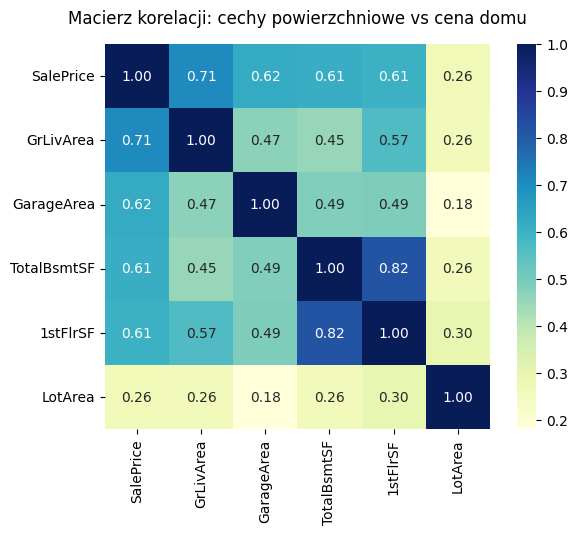

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Wybieramy kolumny
cols = ['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'LotArea']

# Obliczamy macierz korelacji
corr_matrix = df[cols].corr()

# Tworzymy heatmapę
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", square=True)
plt.title("Macierz korelacji: cechy powierzchniowe vs cena domu", pad=15)
plt.show()


Heatmapa potwierdza, że:

GrLivArea (powierzchnia mieszkalna) ma najsilniejszy związek z ceną — współczynnik ok. 0.7,

GarageArea, 1stFlrSF i TotalBsmtSF również są dodatnio skorelowane (ok. 0.6),

LotArea (powierzchnia działki) ma dużo słabszą korelację — jej wpływ na cenę jest ograniczony,

wszystkie zależności są dodatnie — czyli większa powierzchnia, wyższa cena.

Widać więc wyraźnie, że najsilniejszym predyktorem ceny domu jest powierzchnia użytkowa (GrLivArea), co potwierdza naszą hipotezę:

„Większe domy są droższe.”